In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN

In [3]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [4]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [5]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [6]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [7]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [8]:
X = preprocessing.normalize(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_train[:3]

array([[0.55708601, 0.37139068, 0.18569534, 0.18569534, 0.37139068,
        0.18569534, 0.37139068, 0.37139068, 0.18569534],
       [0.64888568, 0.16222142, 0.16222142, 0.16222142, 0.32444284,
        0.48666426, 0.32444284, 0.16222142, 0.16222142],
       [0.28867513, 0.28867513, 0.28867513, 0.28867513, 0.57735027,
        0.28867513, 0.28867513, 0.28867513, 0.28867513]])

In [11]:
X.shape, y.shape

((683, 9), (683, 2))

In [12]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 189
         Function evaluations: 196
         Gradient evaluations: 196


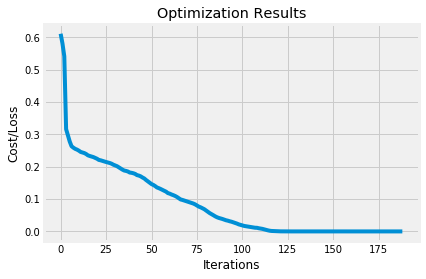

In [13]:
N.plot_cost()

In [14]:
N.compute_accuracy(X_test, y_test)

0.8938053097345132

In [15]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 169
         Function evaluations: 181
         Gradient evaluations: 181


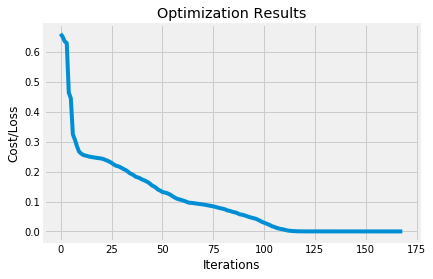

In [16]:
N2.plot_cost()

In [17]:
N2.compute_accuracy(X_test, y_test)

0.9026548672566371

In [19]:
# compare with sklearns implementation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 19), random_state=1)

In [20]:
ymlp_train = y_train.argmax(axis=1)
ymlp_test = y_test.argmax(axis=1)

ymlp_train[:3], ymlp_test[:3]

(array([1, 1, 1], dtype=int64), array([0, 1, 1], dtype=int64))

In [21]:
clf.fit(X_train, ymlp_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 19), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [22]:
accuracy_score(ymlp_test, clf.predict(X_test)), N.compute_accuracy(X_test, y_test)

(0.8805309734513275, 0.8938053097345132)

In [23]:
np.round(clf.predict_proba(X_test), 3)[:10]

array([[0.971, 0.029],
       [0.998, 0.002],
       [0.   , 1.   ],
       [0.542, 0.458],
       [0.   , 1.   ],
       [0.005, 0.995],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.273, 0.727],
       [0.728, 0.272]])

In [24]:
np.round(N.y_hat, 2)[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [25]:
np.round(clf.coefs_[0], 2)

array([[-0.08, -0.66, -1.33, -0.83,  1.25, -0.47, -0.98,  0.4 , -0.1 ,
         0.04, -2.37,  0.03,  0.86,  0.16, -0.47],
       [ 0.17, -0.93, -0.95, -0.58,  4.15,  0.19, -0.01,  0.12,  0.19,
         0.38, -1.65, -0.58,  5.44, -2.35,  0.38],
       [-0.4 , -0.5 , -0.56, -0.44,  2.13, -0.27, -0.09,  0.43, -0.48,
         0.25, -1.63,  0.08,  4.31, -0.69, -0.4 ],
       [-0.05,  0.21, -0.92, -0.44,  1.75, -0.56, -0.21, -0.57, -0.23,
        -0.01, -1.41, -0.03,  3.47, -0.52,  0.2 ],
       [-0.4 ,  1.45, -0.42, -0.37, -2.74, -0.08,  0.36, -0.77,  0.44,
         0.09, -0.28, -0.45, -2.88,  2.21, -0.1 ],
       [-0.33,  0.35, -0.83, -0.09,  1.2 ,  0.05,  0.03,  0.37, -0.15,
        -0.23, -2.25, -0.31,  5.63, -0.13,  0.12],
       [-0.39,  2.13, -0.84, -0.46, -2.11, -0.41,  1.02, -0.65, -0.5 ,
         0.12, -1.61, -0.08, -2.96,  1.94,  0.41],
       [ 0.12,  0.09, -0.93, -0.25,  0.36, -0.35,  0.05,  1.09,  0.2 ,
        -0.43, -1.89,  0.2 ,  3.16,  0.14, -0.38],
       [-0.48,  0.77, -0

In [26]:
np.round(N.Ws[0], 2)

array([[ -1.1 ,  11.95,  -1.04,   2.26,   4.92,  -5.27,   7.99,   1.1 ,
          0.78,   4.6 ,   0.42,   0.24,   4.02,   7.47,   3.28],
       [  3.15,  -2.18,  -0.46,   5.21,  -3.34,  -5.97,  -3.26,  -9.12,
          0.16,  12.24,  -2.  ,  -1.45,  -9.91,   8.47,  -0.53],
       [  4.71,   1.53,  -0.83,  -7.06,  -3.08,   1.  ,  10.7 ,  -1.84,
          4.34,  -0.58,  -7.75,  -0.35,  -5.56,   1.15,   8.23],
       [  7.53,   4.02,  -0.09,   0.3 , -11.8 ,  -1.63,  -7.39, -10.56,
         -2.36,  12.83,   3.36,  -3.5 ,  -1.13,  -0.51,  -0.55],
       [  1.05,  -1.03,  -1.11,  -0.22,   2.39,  -0.13,  -5.27,  -2.07,
         -2.14,  -5.29,  -2.34,  -1.67,   4.79,  -1.52,   6.76],
       [ -8.95, -11.04,  -0.57,  -7.71,  -2.74,   0.39,   5.15,   9.57,
         -1.87,  -2.51,   0.12,  15.25,  -0.11, -10.99,   8.9 ],
       [  5.21,  -1.56,  -0.54,   8.09,   6.64,  -7.11,   1.65,  -7.8 ,
         -4.84,   3.19,   6.79, -10.98, -12.58,  10.1 ,   7.79],
       [  3.04,  -7.91,  -0.72,   4.78,  